In [2]:
import mdapy as mp
import numpy as np
import os


mp.init() # Run on CPU

[Taichi] version 1.6.0, llvm 15.0.4, commit f1c6fbbd, linux, python 3.10.12


[I 08/23/23 20:55:24.460 2224240] [shell.py:_shell_pop_print@23] Graphical python shell detected, using wrapped sys.stdout


[Taichi] Starting on arch=x64


In [3]:
print(mp.__version__)

0.8.7


In [4]:
system = mp.System("./CoCuFeNiPd-4M.dump")

In [5]:
system.data.head()

,id,type,x,y,z
0,1,2,0.006118,-0.310917,-0.345241
1,2,4,1.901900,-0.292456,1.484880
2,3,3,-0.015641,1.584320,1.431290
3,4,5,1.862370,1.511170,-0.372278
4,5,5,3.792570,-0.331891,-0.375830


In [12]:
system.data.shape

(8788, 5)

In [13]:
system.cal_atomic_entropy(rc=3.6*1.4, sigma=0.2, compute_average=True, average_rc=3.6*0.9)
print(system.data.shape)
system.data["atomic_entropy"]

(8788, 7)


0      -6.045966
1      -6.694114
2      -6.876417
3      -7.013987
4      -6.732500
          ...   
8783   -6.391716
8784   -5.709664
8785   -6.336778
8786   -6.443519
8787   -6.464186
Name: atomic_entropy, Length: 8788, dtype: float64

In [15]:
system.cal_common_neighbor_analysis(3.6*0.8536)
print(system.data.shape)
system.data["cna"]

(8788, 8)


0       1
1       1
2       1
3       1
4       1
       ..
8783    1
8784    1
8785    1
8786    1
8787    1
Name: cna, Length: 8788, dtype: int32

In [16]:
system.cal_voronoi_volume()
print(system.data.shape)
print(system.data["voronoi_volume"])
print(system.data["voronoi_number"])
print(system.data["cavity_radius"])

(8788, 11)
0       12.681010
1       12.012947
2       12.197214
3       12.900968
4       12.400861
          ...    
8783    12.074564
8784    11.994945
8785    11.750876
8786    11.753211
8787    11.982535
Name: voronoi_volume, Length: 8788, dtype: float64
0       15
1       14
2       12
3       15
4       14
        ..
8783    14
8784    14
8785    14
8786    13
8787    14
Name: voronoi_number, Length: 8788, dtype: int64
0       3.675684
1       3.581766
2       3.674408
3       3.713117
4       3.645415
          ...   
8783    3.519957
8784    3.566424
8785    3.559122
8786    3.626777
8787    3.547487
Name: cavity_radius, Length: 8788, dtype: float64


In [17]:
system.data.head()

,id,type,x,y,z,atomic_entropy,ave_atomic_entropy,cna,voronoi_volume,voronoi_number,cavity_radius
0,1,2,0.006118,-0.310917,-0.345241,-6.045966,-6.520935,1,12.681010,15,3.675684
1,2,4,1.901900,-0.292456,1.484880,-6.694114,-6.731287,1,12.012947,14,3.581766
2,3,3,-0.015641,1.584320,1.431290,-6.876417,-6.720050,1,12.197214,12,3.674408
3,4,5,1.862370,1.511170,-0.372278,-7.013987,-6.996052,1,12.900968,15,3.713117
4,5,5,3.792570,-0.331891,-0.375830,-6.732500,-6.900816,1,12.400861,14,3.645415


In [18]:
system.rc

5.04

In [19]:
system.verlet_list[0][system.verlet_list[0]>-1]

array([8787, 8786, 8785, 8683, 8678, 8677, 8676, 7890, 7887, 7886, 7885,
       7785, 7782, 7779, 7778, 7777, 7776, 1012, 1010, 1009, 1008, 1007,
        902,  901,  899,  897,  896,  895,  894,  115,  113,  111,  110,
        109,  108,   10,    9,    7,    6,    5,    4,    3,    2,    1],
      dtype=int32)

In [20]:
system.distance_list[0][system.verlet_list[0]>-1]

array([4.48415851, 4.63487321, 4.35033004, 4.32684219, 2.57315649,
       4.56321812, 4.28528359, 4.59095276, 4.66010003, 4.75302553,
       2.75477768, 4.39168451, 4.61796939, 2.72325674, 4.72094208,
       2.60048836, 3.89905069, 4.59982507, 4.55429545, 2.58034816,
       4.3158718 , 5.02072069, 4.39625655, 4.94515661, 4.54723002,
       2.57907233, 2.51207599, 4.33703698, 3.40006632, 4.52692755,
       4.59187976, 4.58003255, 2.63799722, 2.64905416, 3.73204205,
       4.42655427, 3.47691914, 4.43249288, 3.67048701, 4.59684361,
       3.78663373, 2.60123122, 2.59777966, 2.63508509])

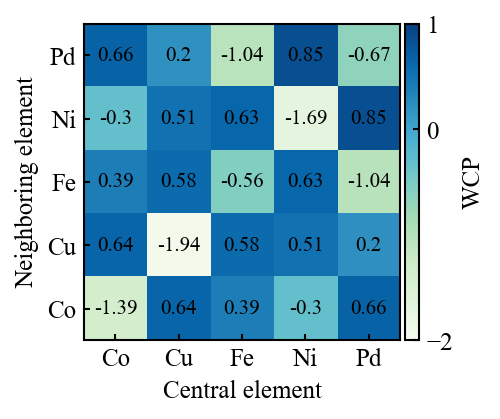

In [7]:
system.cal_warren_cowley_parameter()

from mdapy.plotset import pltset
pltset(fontkind="Times New Roman")

fig, ax = system.WarrenCowleyParameter.plot(['Co', 'Cu', 'Fe', 'Ni', 'Pd'])

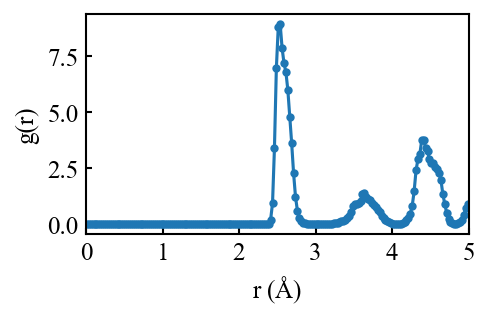

In [8]:
system.cal_pair_distribution()
fig, ax = system.PairDistribution.plot()

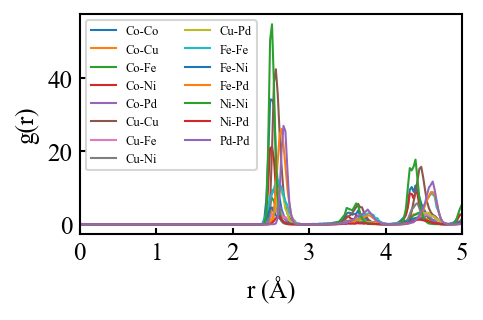

In [9]:
fig, ax = system.PairDistribution.plot_partial(['Co', 'Cu', 'Fe', 'Ni', 'Pd'])